# Is it 90s country music (or older)? - *using NLP classification*

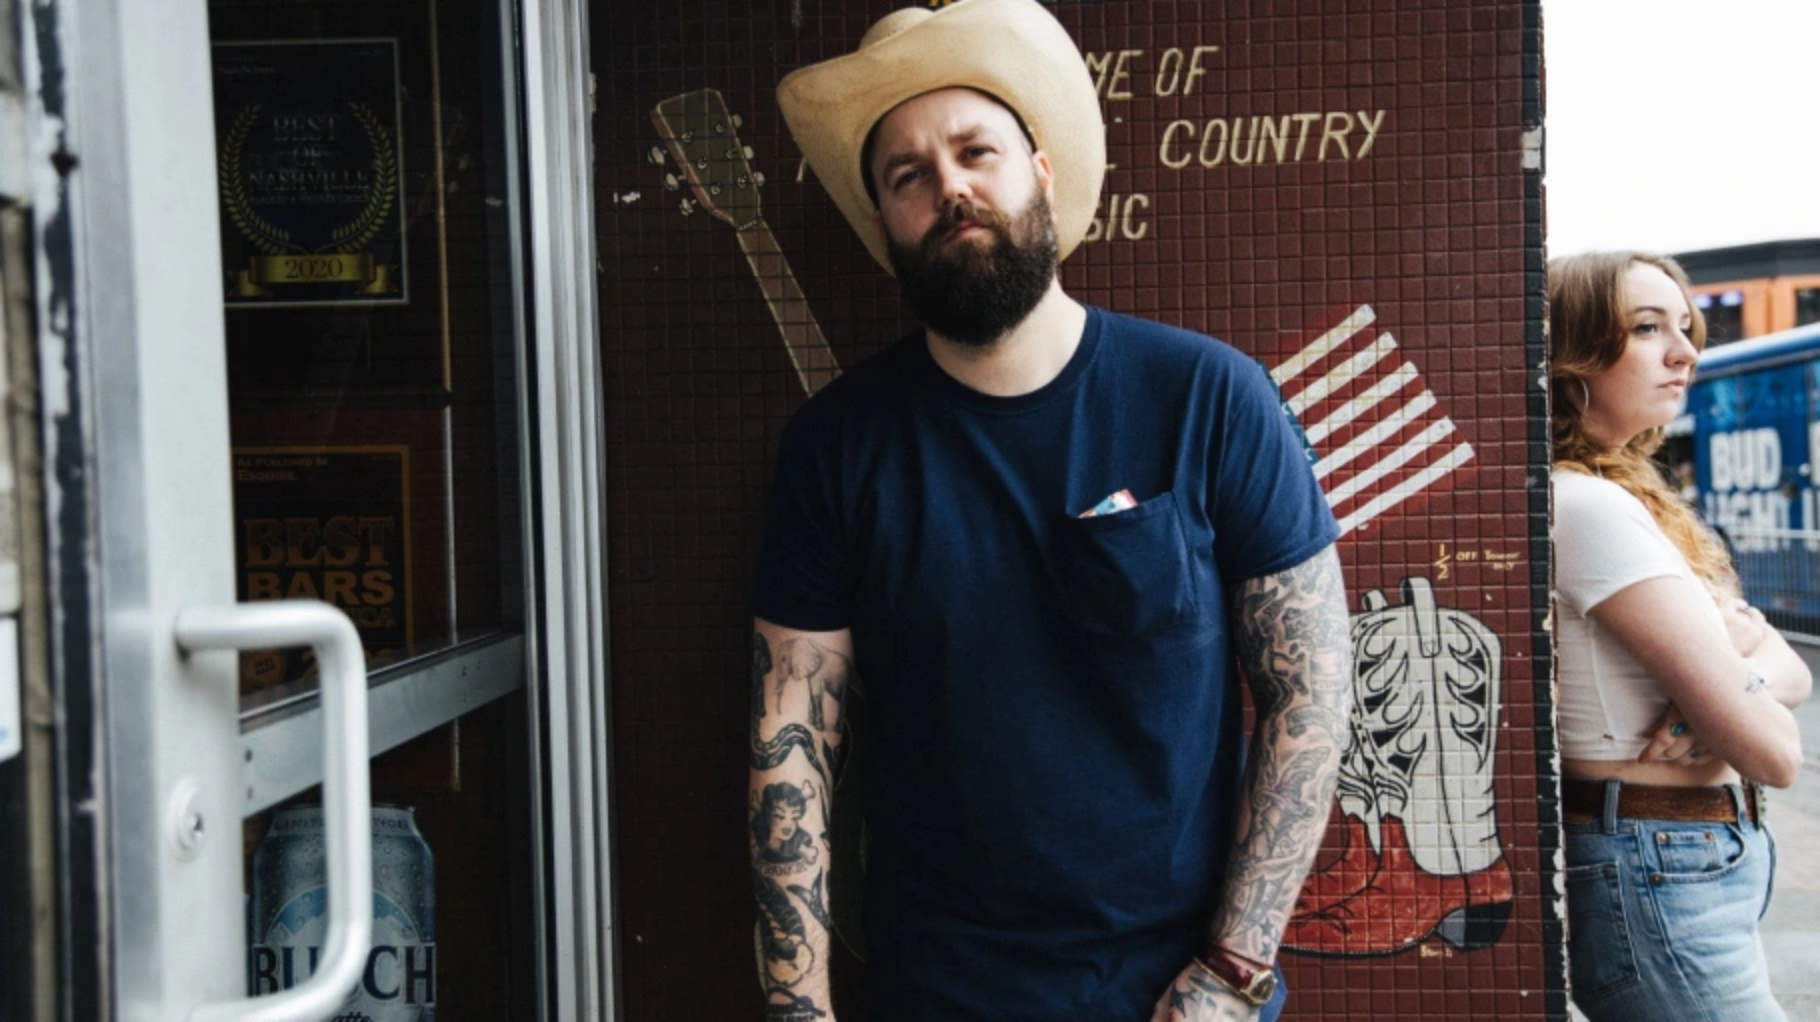

### *"In a statement, Hedley describes the Nineties as “the last bastion of country music,” an era where “You could turn on the radio and immediately know you’re hearing a country song. You could still hear steel guitar and fiddle. But there was a hard fork around 1996 or ‘97, when country veered off into pop territory.”"* 
#### - Joshua Hedley, Rolling Stone magazine Feb 4, 2022 https://www.rollingstone.com/music/music-country/joshua-hedley-neon-blue-1295216/ 
#### Article by Joseph Hudak, Image by Joshua Black Wilkins

## Motivation For The Project

I grew up on 1990s radio country music. Referencing the quote above by Joshua Hedley, I too feel that 90s radio country was the last-best mainstream style that country music had to offer. By lyrics alone can we classify if a country song was made pre-millenium (90s or earlier)?

Country music as a genre has always had room for traditional and classic musicians among whatever else was going on in the popular styles. Joshua Hedley is perhaps my current favorite of such musicians, so I want to put his (and other similar artists') lyrics to the test. Is Joshua Hedley and contemporaries doing a good job lyrically matching pre-millenium lyrical styles?

## Methodology

For the time being, I picked a handful of #1 Billboard Country Music songs, as well as a few notable classic radio hits, starting in the 1950s through early 2023. I grabbed all of these songs **by hand** from a variety of Google Searched lyric sites and put them in a Google Sheets table and exported them as a CSV. In the long term I would like to grow the library of songs that I use for this analysis (but I am truthfully not the best webscraper yet) - but the sampling should be of the most popular songs for their respective eras. Aside from the dreadfully small size of the library, there is an additional bias in time since the label designation that could lead to simple classifications being driven by number of songs alone (i.e. more likely to 90s or earlier since Billboard country music dates back to the 1950s). A higher quality dataset should also include a well designed sampling of songs/eras concious of all of the aforementioned.

I use Natural Language Processing (NLP) and Naive Bayes methods to build models on this sample of lyrics, specifically classifying them as **Pre-Millenium** and **Post-Millenium**.

#### The counter test will be to take traditional and classic country songs written within the last 10-15 years and test if they are in fact lyrically matching the *Pre-Millenium* styles they claim to. As a disclaimer, these songs will not likely be radio hits, nor may they appear on the radio at all.

## References


To be transparent, I base much of the following analysis from my lecture notes and examples from the following Udemy courses: 

***Python for Data Science and Machine Learning Bootcamp*** by Jose Portilla

***Machine Learning Classification Bootcamp in Python*** by Dr. Ryan Ahmed, Ph.D., MBA

as well as chunks of code gleaned from similar studies on Kaggle. Note this data set was aquired outside of these courses. The code here also has been modified from the original sources as it applies to this specific work, as well as to differentiate it from the course content.

Also to be extremely transparent, *Country Lyric Analysis* ( https://countrylyricanalysis.com/ ) is a far more advanced, user-forward, website that ***already exists***. My inspiration for this project came from being aware of these results, specifically seeing a reference to this regarding how often the word "truck" shows up in modern country music. 

This all said, I have no desire to plagerize any material from the *Country Lyric Analysis* page or pass any of their ideas off as my own. I categorically (ML joke) want to state that I am inspired and impressed by their work and wish I was at that stage of my Data Science journey to be able to create content like that.

Thus, to be clear of the goals of my project:
1. To get practice doing ML techniques, focusing on topics that I find interesting. 
2. To execute a few projects to include in a portfolio to help get hired. I want to be able to show off my skills alone.

#### Notes for me:
Other helpful sources: https://thatascience.com/learn-machine-learning/bag-of-words/

Web Scraping tips for future iterations: https://realpython.com/python-web-scraping-practical-introduction/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('CountrySongs.csv')
df_c = pd.read_csv('CountrySongs_CounterTest.csv')

In [3]:
df.head(5)

,Artist,Song,Lyrics,Year
0,Hank Williams,Lovesick Blues,"I got a feelin' called the blues, oh Lord\nSin...",1949
1,Hank Snow,I'm Moving' On,"That big eight-wheeler, rollin' down the track...",1950
2,Lefty Frizzell,If You've Got the Money I've Got the Time,"If you've got the money, I've got the time\nWe...",1950
3,George Jones,White Lightning,Well in North Carolina way back in the hills m...,1959
4,Buck Owens,Love's Gonna Live Here,"Oh the sun's gonna shine, in my life once more...",1963


In [4]:
df2 = df.copy()
Y_Class = df2['Artist'].iloc[:].values
#Y_Class = np.chararray(len(df['Artist']))

Y_Class[df['Year'] < 2000] = 'Pre-Millenium'
Y_Class[df['Year'] >= 2000] = 'Post-Millenium'
df['Y_Class'] = Y_Class

In [5]:
df.head(5)

,Artist,Song,Lyrics,Year,Y_Class
0,Hank Williams,Lovesick Blues,"I got a feelin' called the blues, oh Lord\nSin...",1949,Pre-Millenium
1,Hank Snow,I'm Moving' On,"That big eight-wheeler, rollin' down the track...",1950,Pre-Millenium
2,Lefty Frizzell,If You've Got the Money I've Got the Time,"If you've got the money, I've got the time\nWe...",1950,Pre-Millenium
3,George Jones,White Lightning,Well in North Carolina way back in the hills m...,1959,Pre-Millenium
4,Buck Owens,Love's Gonna Live Here,"Oh the sun's gonna shine, in my life once more...",1963,Pre-Millenium


<AxesSubplot:xlabel='Y_Class', ylabel='count'>

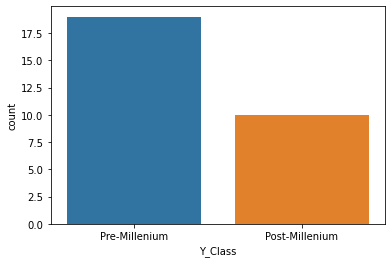

In [6]:
#plt.figure(figsize=(40,15))
#plt.rcParams['font.size'] = 30
sns.countplot(x = 'Y_Class', data=df)

In [7]:
df = df.drop(['Artist','Song','Year'],axis=1)

In [8]:
df.head(5)

,Lyrics,Y_Class
0,"I got a feelin' called the blues, oh Lord\nSin...",Pre-Millenium
1,"That big eight-wheeler, rollin' down the track...",Pre-Millenium
2,"If you've got the money, I've got the time\nWe...",Pre-Millenium
3,Well in North Carolina way back in the hills m...,Pre-Millenium
4,"Oh the sun's gonna shine, in my life once more...",Pre-Millenium


In [9]:
Xt = df['Lyrics'].iloc[:].values
y = df['Y_Class'].iloc[:].values

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
thecount=CountVectorizer(stop_words='english')

## Testing a *new* sample *after* training the model often doesn't work because the new data has different sample of words.

For this reason I add all of the *new* data to the vectorization step so that those words will show up in the word vectorization.

There are other options, such as dropping words that don't show up in the training/testing phase. I think it's nice to not

In [11]:
#Use Josh Hedley as a test case (old styles, new music)
#X_hedley_t=np.array(["Feed me nickels, feed me dimes I'll play your favorite song just one more time I'm right here in the corner anytime you're feeling blue If you've got a new romance Well I've got the perfect dance If you need me I'll be here, I'm Mr. Jukebox This old barroom is my home It's the only one I've known I've been here since I was a little boy Singing songs that people know I watch them dancing to and fro While the music plays new lovers find their joy Feed me nickels, feed me dimes I'll play your favorite song just one more time I'm right here in the corner anytime you're feeling blue If you've got a new romance Well I've got the perfect dance If you need me I'll be here, I'm Mr. Jukebox Every night at closing time Johnny's down to his last dime Still he manages to buy another round I watch him clinging to the past As I play there stands the glass You can almost hear the teardrops hit the ground Feed me nickels, feed me dimes I'll play your favorite song just one more time I'm right here in the corner anytime you're feeling blue If you've got a new romance Well I've got the perfect dance If you need me I'll be here, I'm Mr. Jukebox", "Well it was off to the races after that first dance I knew where we were headed if she'd give me the chance A little Friday night loving how could I lose Well I should've heard it coming like a train down the track Must've been in a hurry cause in no time flat She turned my honky tonk heart neon blue Neon blue, Neon blue That girl knew how to paint me a fool She turned my honky tonk heart neon blue If lonely was a color it would look like me Drinking double shots of whiskey while the jukebox sings Another song about heartache and an old bar stool Well the next thing I remember was red tail lights Yeah that long-gone baby with them deep green eyes She turned my honky tonk heart neon blue Neon blue, Neon blue That girl knew how to paint me a fool She turned my honky tonk heart neon blue Neon blue, Neon blue That girl knew how to paint me a fool She turned my honky tonk heart neon blue Bluer than the ocean, bluer than the skies Bluer than the sound of a steel guitar crying Why she up and left guess I'll never know why She turned my honky tonk heart neon blue"])

Xt_c = df_c['Lyrics'].iloc[:].values


In [12]:
nc = len(Xt_c)

In [13]:
Xt_tot = Xt.copy()

In [14]:
Xt_tot = np.append(Xt_tot,Xt_c)

In [15]:
X_tot = thecount.fit_transform(Xt_tot)

In [16]:
#https://thatascience.com/learn-machine-learning/bag-of-words/
bow = pd.DataFrame(X_tot.toarray(), columns = thecount.get_feature_names_out())
bow.head(5)

,00,12,55,60,accidentally,add,addy,ain,air,alan,...,wouldn,wounded,wreck,writin,wrong,ya,yard,yeah,yes,yo
0,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
featnames = thecount.get_feature_names_out()

In [18]:
#drop the numbers

featnames = featnames[5:]
X = X_tot[:-nc,5:]
X_c = X_tot[-nc:,5:]

In [19]:
#https://thatascience.com/learn-machine-learning/bag-of-words/
bow2 = pd.DataFrame(X.toarray(), columns = featnames) # train/test set, not including counter test
bow2.head(5)

,add,addy,ain,air,alan,album,alcohol,alley,amarillo,american,...,wouldn,wounded,wreck,writin,wrong,ya,yard,yeah,yes,yo
0,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bow2[featnames].sum()

add      1
addy     2
ain     29
air      2
alan     2
        ..
ya       3
yard     1
yeah    32
yes      3
yo       1
Length: 980, dtype: int64

In [21]:
'''
import copy as cp

bow3=cp.deepcopy(bow2)

bow3['labels']=y

bow3.to_csv('CountryMusicBeforeMillenium_BOW.csv',index=False) #export this to try AWS sagemaker later
'''

"\nimport copy as cp\n\nbow3=cp.deepcopy(bow2)\n\nbow3['labels']=y\n\nbow3.to_csv('CountryMusicBeforeMillenium_BOW.csv',index=False) #export this to try AWS sagemaker later\n"

## Train the Model

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [24]:
themodel=nb.fit(X_train,y_train)

In [25]:
y_pred = themodel.predict(X_test)

## Visualize Results

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

Training Set - Heatmap


<AxesSubplot:>

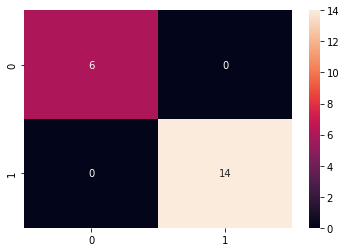

In [27]:
y_predict_train = nb.predict(X_train)
y_predict_train
cm_train = confusion_matrix(y_train, y_predict_train)
print("Training Set - Heatmap")
sns.heatmap(cm_train, annot=True)

Test Set - Heatmap


<AxesSubplot:>

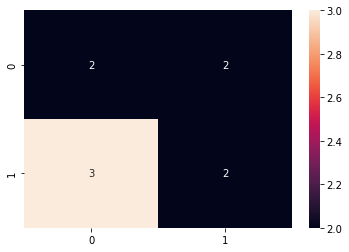

In [28]:
y_predict_test = nb.predict(X_test)
cm_test = confusion_matrix(y_test, y_predict_test)
print("Test Set - Heatmap")
sns.heatmap(cm_test, annot=True)

In [29]:
print(classification_report(y_test,y_predict_test))

                precision    recall  f1-score   support

Post-Millenium       0.40      0.50      0.44         4
 Pre-Millenium       0.50      0.40      0.44         5

      accuracy                           0.44         9
     macro avg       0.45      0.45      0.44         9
  weighted avg       0.46      0.44      0.44         9



# Test/Train results - not that trustworthy

The test results are far from ideal, 40-50% accuracy. This is not surprising, considering just how small the data volume is. Thus the counter test results can not be taken with much confidence. Despite, I will continue the analysis for when I am able to grow the dataset.

# Does modern traditional country get classified as older?

The songs in the "counter" test are from country artists who are known for their *retro* or traditional country styles. My theory is that their lyrics on average will track as *pre-millenium* for this reason.

In [30]:
c_pred = themodel.predict(X_c)

In [31]:
X_c.shape

(4, 980)

In [32]:
c_pred

array(['Pre-Millenium', 'Post-Millenium', 'Post-Millenium',
       'Pre-Millenium'], dtype='<U14')

In [33]:
df_c['Y_Class_pred']=c_pred

In [34]:
df_c

,Artist,Song,Lyrics,Year,Y_Class_pred
0,Joshua Hedley,Mr. Jukebox,"Feed me nickels, feed me dimes I'll play your ...",2018,Pre-Millenium
1,Joshua Hedley,Neon Blue,Well it was off to the races after that first ...,2022,Post-Millenium
2,Margo Price,Hurtin' (On The Bottle),"I put a hurtin' on the bottle\nBaby, now I'm b...",2016,Post-Millenium
3,Jason James,I've Been Drinkin' More,I've been drinkin' more\nSince you've been lov...,2015,Pre-Millenium


## Counter test results

For the 4 entries in the counter test, 50% were classified as pre-millenium. While it would be great to conclude this as a proof of concept, the test data in the train/test portion of the project only gave 40-50% accuracy. So this could just as confidently be regarded as 50% accuracy in the data prediction, in line with the test data.

## NLP With TensorFlow/Keras - *In Progress*

References:

https://realpython.com/python-keras-text-classification/

https://medium.com/geekculture/nlp-with-tensorflow-keras-explanation-and-tutorial-cae3554b1290

While I have used Keras in some guided coursework, I have not tried to use it on any original project. I think this is clearly overkill for the dataset that I am playing around with, I want to learn to use these tools better. 